# EDA and Data Visualization

While a more robust dashboard will be built in Tableau, we want to continue exploring data while visualizing relationships between features here in Python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# bringing back in data frames ff_all and ff_collective

starter_df = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_starters_by_year.csv", index_col = 0)
ff_tall = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_collective_filtered.csv", index_col = 0)

qb_wide = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide.csv", index_col = 0)
rb_wide = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_wide.csv", index_col = 0)
wr_wide = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_wide.csv", index_col = 0)
te_wide = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_wide.csv", index_col = 0)

## DataFrame explanation

starter_df contains the players that ranked as in the top 12 as a QB or TE, top 24 as an RB and top 36 as a WR, with a row for each season and each player. 

ff_tall contains players that played in at least 6 games each season AND also scored in the top 50% of all players over all seasons (~33 points). The purpose for these two are for more holistic data analysis and visualization of fantasy.

Each position 'wide' (i.e. rb_wide) contains a row per player that contains their stats from 2019 - 2022. The purpose of this DF is to model off of it and utilize a players previous year's stats to predict how they will do the following season.

In [4]:
ff_tall.head()

team       player_name position player_id_x  height  weight  years_exp  \
1   ARI      Kyler Murray       QB  00-0035228    70.0   207.0        0.0   
4   ARI     David Johnson       RB  00-0032187    73.0   224.0        4.0   
5   ARI      Kenyan Drake       RB  00-0033118    73.0   211.0        3.0   
8   ARI     Chase Edmonds       RB  00-0034681    69.0   210.0        1.0   
14  ARI  Larry Fitzgerald       WR  00-0022921    75.0   218.0       15.0   

     tm pos   age  ...  std_fp  std_fp_5ptd  hppr_fp  hppr_fp_5ptd  \
1   ARI  QB  22.0  ...  279.28       299.28   279.28        299.28   
4   ARI  RB  28.0  ...  105.50       105.50   123.50        123.50   
5   2TM  RB  25.0  ...  162.20       162.20   187.20        187.20   
8   ARI  RB  23.0  ...   70.80        70.80    76.80         76.80   
14  ARI  WR  36.0  ...  102.40       102.40   139.90        139.90   

    te_prem_pts  te_prem_pts_p5td  hppr_pts_pg_5ptd  te_prem_pts_pg_5ptd  \
1        279.28            299.28         18.705000            18.705000   
4        123.50            123.50          9.500000             9.500000   
5        187.20            187.20         13.371429            13.371429   
8         76.80             76.80          5.907692             5.907692   
14       139.90            139.90          8.743750             8.743750   

    season_position_rank     ff_level  
1                    8.0            1  
4                   38.0  Non-starter  
5                   16.0            2  
8                   54.0  Non-starter  
14                  36.0            3  

[5 rows x 126 columns]

### Scoring and positions as a whole

In [5]:
pd.set_option('display.max_columns', None)
starter_df.head()

team     player_name position player_id_x  height  weight  years_exp   tm  \
0  BAL   Lamar Jackson       QB  00-0034796    74.0   212.0        1.0  BAL   
1  DAL    Dak Prescott       QB  00-0033077    74.0   238.0        3.0  DAL   
2  SEA  Russell Wilson       QB  00-0029263    71.0   215.0        7.0  SEA   
3  HOU  Deshaun Watson       QB  00-0033537    74.0   221.0        2.0  HOU   
4   TB  Jameis Winston       QB  00-0031503    76.0   231.0        4.0  TAM   

  pos   age     g    gs  tgt  rec  passingyds  passingtd  passingatt  \
0  QB  22.0  15.0  15.0  0.0  0.0      3127.0       36.0       401.0   
1  QB  26.0  16.0  16.0  0.0  0.0      4902.0       30.0       596.0   
2  QB  31.0  16.0  16.0  0.0  0.0      4110.0       31.0       516.0   
3  QB  24.0  15.0  15.0  1.0  1.0      3852.0       26.0       495.0   
4  QB  25.0  16.0  16.0  0.0  0.0      5109.0       33.0       626.0   

   rushingyds  rushingtd  rushingatt  receivingyds  receivingtd  \
0      1206.0        7.0       176.0           0.0          0.0   
1       277.0        3.0        52.0           0.0          0.0   
2       342.0        3.0        75.0           0.0          0.0   
3       413.0        7.0        82.0           6.0          1.0   
4       250.0        1.0        59.0           0.0          0.0   

   fantasypoints   int  fumbles  fumbleslost    adp            name  season  \
0         415.68   6.0      9.0          2.0   98.0   Lamar Jackson    2019   
1         335.78  11.0      6.0          2.0  131.0    Dak Prescott    2019   
2         326.60   5.0      8.0          2.0   93.0  Russell Wilson    2019   
3         318.98  12.0     10.0          3.0   48.0  Deshaun Watson    2019   
4         297.36  30.0     12.0          5.0  111.0  Jameis Winston    2019   

   cmp  ppr  dkpt  fdpt  vbd team_abb  player_id_y  qbr_total  pts_added  \
0  NaN  NaN   NaN   NaN  NaN      BAL    3916387.0       83.0       66.7   
1  NaN  NaN   NaN   NaN  NaN      DAL    2577417.0       71.9       48.1   
2  NaN  NaN   NaN   NaN  NaN      SEA      14881.0       71.5       43.0   
3  NaN  NaN   NaN   NaN  NaN      HOU    3122840.0       70.5       42.3   
4  NaN  NaN   NaN   NaN  NaN       TB    2969939.0       55.7       20.1   

   qb_plays  epa_total  pass   run  exp_sack  qbr_raw  sack    name_display  \
0     613.0      103.7  55.0  39.1       0.0     82.3  -7.4   Lamar Jackson   
1     690.0       93.1  70.7  10.0       0.0     72.8  -9.7    Dak Prescott   
2     674.0       90.9  58.3  10.6       0.0     71.2 -20.6  Russell Wilson   
3     662.0       91.6  52.0  19.8       0.0     71.2 -18.5  Deshaun Watson   
4     772.0       78.4  48.7   9.0       0.0     59.1 -18.3  Jameis Winston   

  player_display_name player_gsis_id_x  avg_time_to_throw  \
0       Lamar Jackson       00-0034796           2.943613   
1        Dak Prescott       00-0033077           2.863889   
2      Russell Wilson       00-0029263           2.857214   
3      Deshaun Watson       00-0033537           2.811673   
4      Jameis Winston       00-0031503           2.773831   

   avg_completed_air_yards  avg_intended_air_yards  \
0                 6.721439                8.814669   
1                 7.383088                9.074466   
2                 6.919418                9.558971   
3                 6.598724                8.822830   
4                 8.317304               10.508673   

   avg_air_yards_differential  aggressiveness  max_completed_air_distance  \
0                   -2.093231       14.902159                   38.032465   
1                   -1.691378       17.214539                   41.775767   
2                   -2.639553       19.070277                   43.704954   
3                   -2.224106       15.675721                   43.954208   
4                   -2.191370       17.202558                   43.811773   

   avg_air_yards_to_sticks   attempts  pass_yards  pass_touchdowns  \
0                 0.242468  50.125000  390.875000         4

In [6]:
qb_wide.head()

1std_2019  1std_2020  1std_2021  1std_2022  adp_2019  adp_2020  \
player_name                                                                     
AJ McCarron        346.0      326.0      306.0        NaN       0.0       0.0   
Aaron Rodgers      320.0      358.0      375.0      107.0      57.0      89.0   
Alex McGough       346.0      356.0        NaN        NaN       0.0       0.0   
Alex Smith           0.0        0.0        NaN        NaN       0.0       0.0   
Alex Tanney        311.0      297.0        NaN        NaN       0.0       0.0   

               adp_2021  adp_2022  age_2019  age_2020  age_2021  age_2022  \
player_name                                                                 
AJ McCarron         0.0       NaN       0.0       0.0       0.0       NaN   
Aaron Rodgers      67.0      92.0      36.0      37.0      38.0      39.0   
Alex McGough        NaN       NaN       0.0       0.0       NaN       NaN   
Alex Smith          NaN       NaN       0.0      36.0       NaN       NaN   
Alex Tanney         NaN       NaN      32.0       0.0       NaN       NaN   

               aggressiveness_2019  aggressiveness_2020  aggressiveness_2021  \
player_name                                                                    
AJ McCarron              16.666667             0.000000             0.000000   
Aaron Rodgers            13.803295            10.579508            16.516486   
Alex McGough              0.000000             0.000000                  NaN   
Alex Smith                0.000000            13.764516                  NaN   
Alex Tanney               0.000000             0.000000                  NaN   

               aggressiveness_2022  attempts_2019  attempts_2020  \
player_name                                                        
AJ McCarron                    NaN      36.000000       0.000000   
Aaron Rodgers            15.095707      66.941176      61.882353   
Alex McGough                   NaN       0.000000       0.000000   
Alex Smith                     NaN       0.000000      56.000000   
Alex Tanney                    NaN       0.000000       0.000000   

               attempts_2021  attempts_2022  avg_air_distance_2019  \
player_name                                                          
AJ McCarron         0.000000            NaN              20.992778   
Aaron Rodgers      62.470588      60.222222              23.003235   
Alex McGough             NaN            NaN               0.000000   
Alex Smith               NaN            NaN               0.000000   
Alex Tanney              NaN            NaN               0.000000   

               avg_air_distance_2020  avg_air_distance_2021  \
player_name                                                   
AJ McCarron                 0.000000               0.000000   
Aaron Rodgers              22.344334              21.579879   
Alex McGough                0.000000                    NaN   
Alex Smith                 18.412256                    NaN   
Alex Tanney                 0.000000                    NaN   

               avg_air_distance_2022  avg_air_yards_differential_2019  \
player_name                                                             
AJ McCarron                      NaN                        -3.910893   
Aaron Rodgers              21.550354                        -3.306670   
Alex McGough                     NaN                         0.000000   
Alex Smith                       NaN                         0.000000   
Alex Tanney                      NaN                         0.000000   

               avg_air_yards_differential_2020  \
player_name                                      
AJ McCarron                           0.000000   
Aaron Rodgers                        -2.584132   
Alex McGough                          0.000000   
Alex Smith                           -1.681402   
Alex Tanney                           0.000000   

               avg_air_yards_differential_2021  \
player_name            

## Each position, year over year

### QBs

In [7]:
qb_wide.shape

(180, 408)

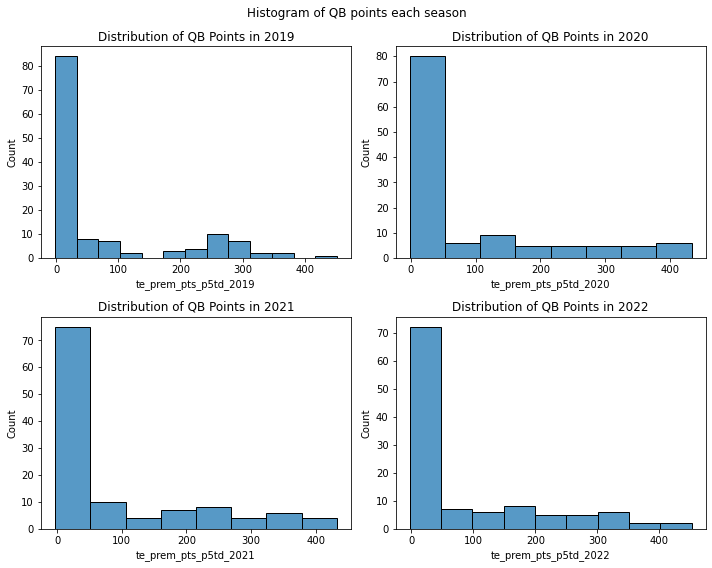

In [8]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Histogram of QB points each season')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(x=f'te_prem_pts_p5td_{year}',data= qb_wide, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of QB Points in {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [9]:
# can we cut this data down to a relevant top percentile?

qb_wide[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 
    'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].quantile([ .3, .4, .5, .6, .67,.7, .75, .8])

te_prem_pts_p5td_2019  te_prem_pts_p5td_2020  te_prem_pts_p5td_2021  \
0.30                 0.0000                  0.000                  0.000   
0.40                 0.0000                  1.280                  0.520   
0.50                 0.0000                  9.520                 11.390   
0.60                10.2800                 20.160                 32.324   
0.67                41.9736                 56.132                 70.806   
0.70                60.7460                 71.340                 88.054   
0.75                92.5300                141.020                151.095   
0.80               204.7600                186.720                201.268   

      te_prem_pts_p5td_2022  
0.30                 0.0000  
0.40                 7.2160  
0.50                17.7200  
0.60                40.9800  
0.67                62.2096  
0.70                97.7600  
0.75               131.4200  
0.80               181.5600

In [10]:
# because of nature of the data, let's see how many are null as well

qb_wide[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].isna().sum()

te_prem_pts_p5td_2019    50
te_prem_pts_p5td_2020    59
te_prem_pts_p5td_2021    62
te_prem_pts_p5td_2022    67
dtype: int64

Based on how many rows and then nulls, seems there are anywhere from 113 - 130 qbs per season that are in here.

We can definitely trim this down. Let's take, about the top 3rd -- that is, they have to be about in the top 3rd fantasy pts scored at least for one of these seasons to be eligible.

In [11]:
# let's filter out QBs a bit further

# because of nature of the data, let's see how many are null as well

qb_filtered = qb_wide.loc[(qb_wide['te_prem_pts_p5td_2019'] >= 41.97 )| (qb_wide['te_prem_pts_p5td_2020'] >= 56.132) | \
                     (qb_wide['te_prem_pts_p5td_2021'] >= 71.34) |  (qb_wide['te_prem_pts_p5td_2022'] >= 62.21) ]

In [12]:
print('nulls of qb_filtered now: ', 
      qb_filtered[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].isna().sum(),
     'Shape of qb_filtered: ',
     qb_filtered.shape)

nulls of qb_filtered now:  te_prem_pts_p5td_2019    12
te_prem_pts_p5td_2020     9
te_prem_pts_p5td_2021     7
te_prem_pts_p5td_2022    11
dtype: int64 Shape of qb_filtered:  (66, 408)


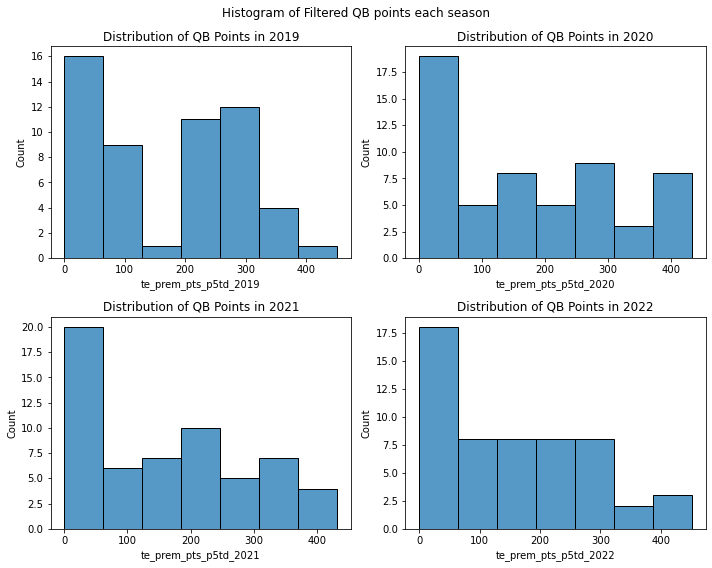

In [13]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Histogram of Filtered QB points each season')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(x=f'te_prem_pts_p5td_{year}',data= qb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of QB Points in {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

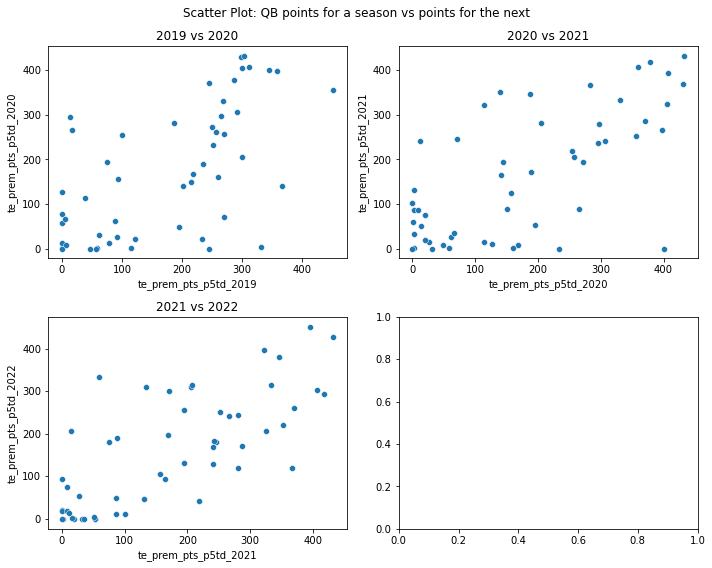

In [14]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: QB points for a season vs points for the next')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'te_prem_pts_p5td_{year}', y=f'te_prem_pts_p5td_{next_year}', data= qb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'{year} vs {next_year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

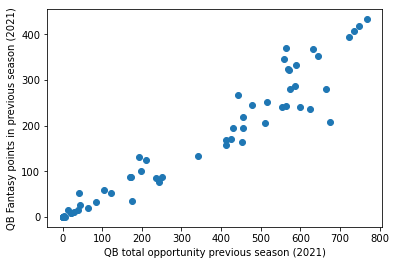

In [15]:
plt.scatter(qb_filtered['ttl_opp_2021'], qb_filtered['te_prem_pts_p5td_2021'])
plt.xlabel('QB total opportunity previous season (2021)')
plt.ylabel('QB Fantasy points in previous season (2021)')

plt.show()

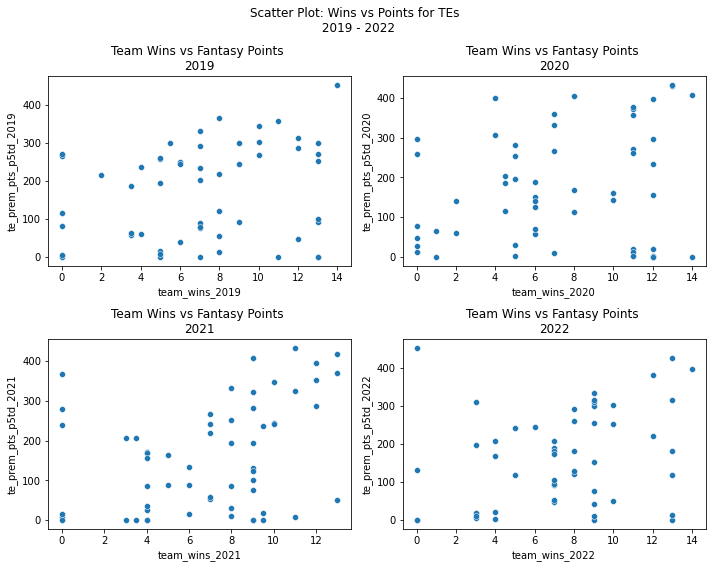

In [86]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Wins vs Points for TEs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'team_wins_{year}', y=f'te_prem_pts_p5td_{year}', data=qb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Team Wins vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

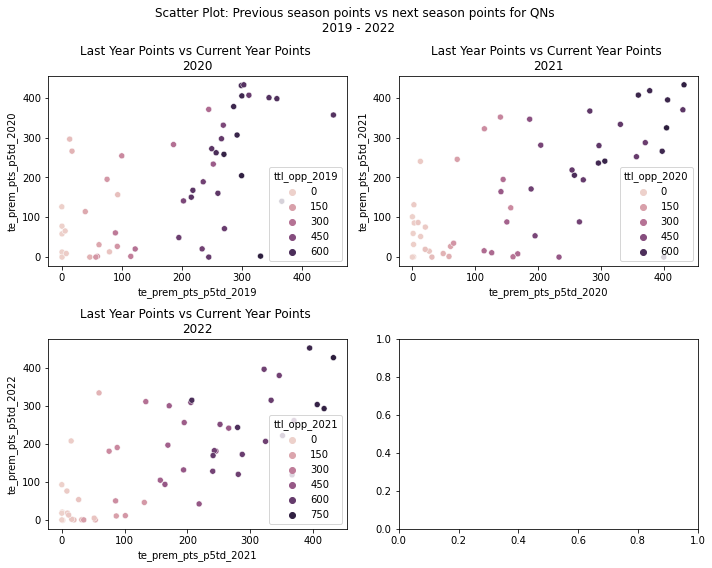

In [90]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Previous season points vs next season points for QNs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'te_prem_pts_p5td_{year}', y=f'te_prem_pts_p5td_{next_year}', hue = f'ttl_opp_{year}', data=qb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Last Year Points vs Current Year Points \n{next_year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

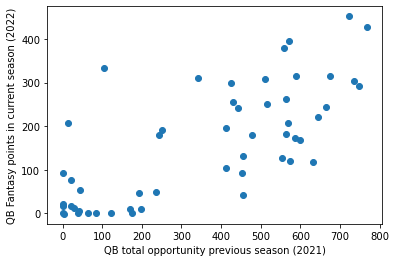

In [16]:
# how does previous amount of touches in previous year reflect next year's points?

plt.scatter(qb_filtered['ttl_opp_2021'], qb_filtered['te_prem_pts_p5td_2022'])
plt.xlabel('QB total opportunity previous season (2021)')
plt.ylabel('QB Fantasy points in current season (2022)')

plt.show()

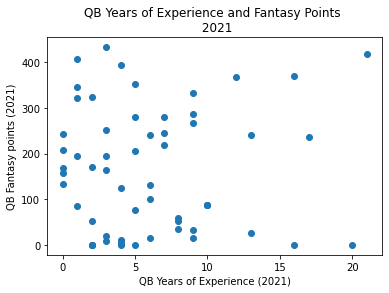

In [17]:
plt.scatter(qb_filtered['years_exp_2021'], qb_filtered['te_prem_pts_p5td_2021'] )
plt.xlabel('QB Years of Experience (2021)')
plt.ylabel('QB Fantasy points (2021)')
plt.title('QB Years of Experience and Fantasy Points \n 2021')

plt.show()

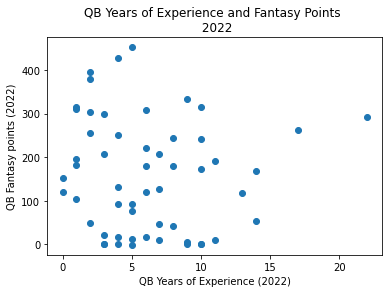

In [18]:
plt.scatter(qb_filtered['years_exp_2022'], qb_filtered['te_prem_pts_p5td_2022'] )
plt.xlabel('QB Years of Experience (2022)')
plt.ylabel('QB Fantasy points (2022)')
plt.title('QB Years of Experience and Fantasy Points \n 2022')

plt.show()

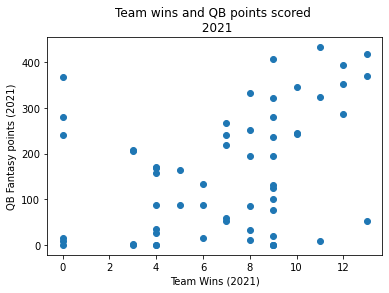

In [19]:
plt.scatter(qb_filtered['wins_2021'], qb_filtered['te_prem_pts_p5td_2021'] )
plt.xlabel('Team Wins (2021)')
plt.ylabel('QB Fantasy points (2021)')
plt.title('Team wins and QB points scored \n 2021')

plt.show()

<AxesSubplot:>

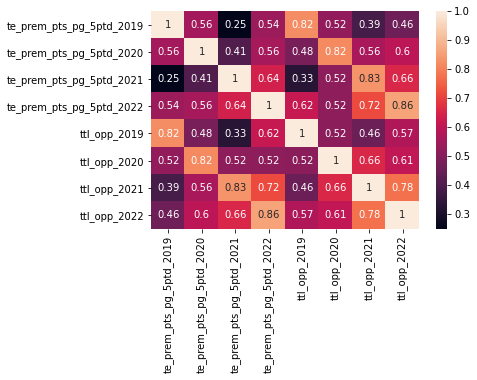

In [20]:
# let's check correlation between a few of these

sns.heatmap(qb_filtered[['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020', 'te_prem_pts_pg_5ptd_2021'\
                     , 'te_prem_pts_pg_5ptd_2022', 'ttl_opp_2019','ttl_opp_2020', 'ttl_opp_2021', 'ttl_opp_2022']]\
            .corr(), annot = True)

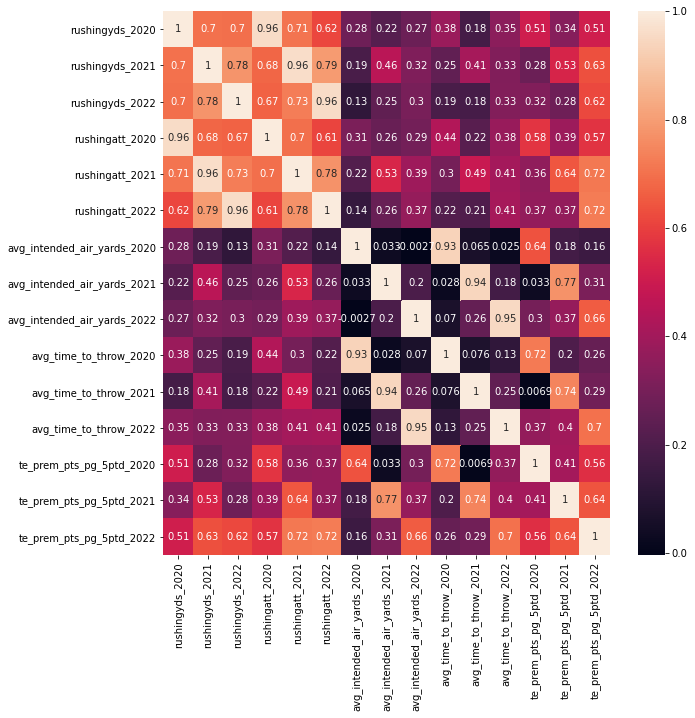

In [21]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(qb_filtered[['rushingyds_2020', 'rushingyds_2021', 'rushingyds_2022',
                     'rushingatt_2020', 'rushingatt_2021', 'rushingatt_2022',
                   'avg_intended_air_yards_2020', 'avg_intended_air_yards_2021',
                   'avg_intended_air_yards_2022', 'avg_time_to_throw_2020' , 'avg_time_to_throw_2021', 
                   'avg_time_to_throw_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

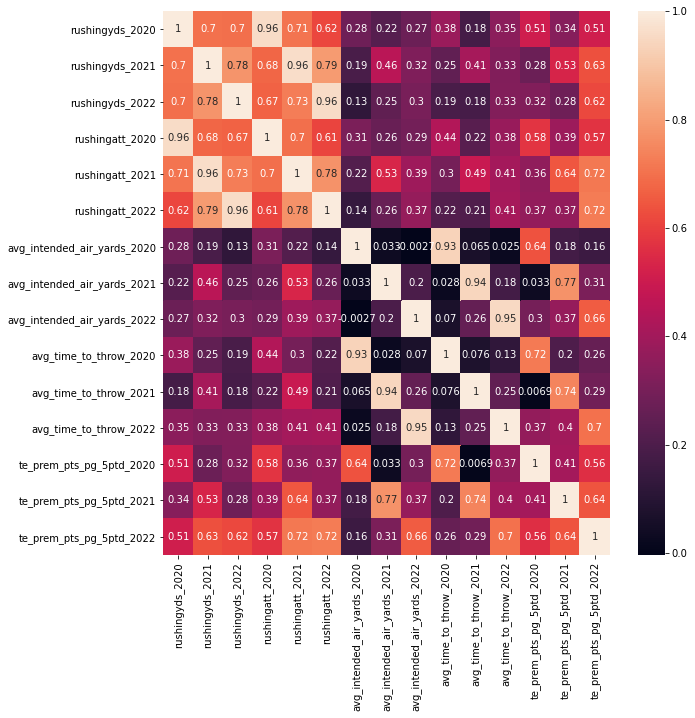

In [22]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(qb_filtered[['rushingyds_2020', 'rushingyds_2021', 'rushingyds_2022',
                     'rushingatt_2020', 'rushingatt_2021', 'rushingatt_2022',
                   'avg_intended_air_yards_2020', 'avg_intended_air_yards_2021',
                   'avg_intended_air_yards_2022', 'avg_time_to_throw_2020' , 'avg_time_to_throw_2021', 
                   'avg_time_to_throw_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

For QBs, past success seems to be indicitive of future success - even scores from 3 years ago all give a moderately high correlation to points (.64 for 2019 to 2022, .66 for 2020 to 2022, and .72 for the following year). Opportunities and points per game all are fairly high. Also, stats like rushing yards, as expected, have a moderate to strong correlation with points, even year over year for following years. Interestingly, though, attempts has a higher correlation with points. Intended air yards definitely have an impact in-year on points, but not as strong year over year. Same with time to throw.

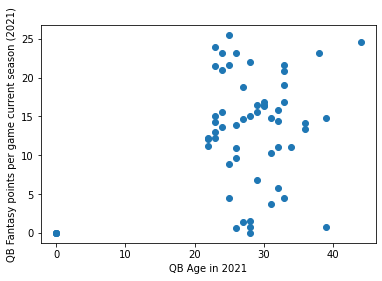

In [23]:
plt.scatter(qb_filtered['age_2021'], qb_filtered['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('QB Age in 2021')
plt.ylabel('QB Fantasy points per game current season (2021)')

plt.show()


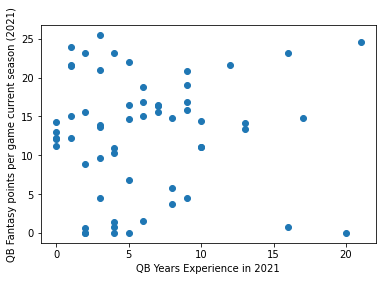

In [24]:
plt.scatter(qb_filtered['years_exp_2021'], qb_filtered['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('QB Years Experience in 2021')
plt.ylabel('QB Fantasy points per game current season (2021)')

plt.show()

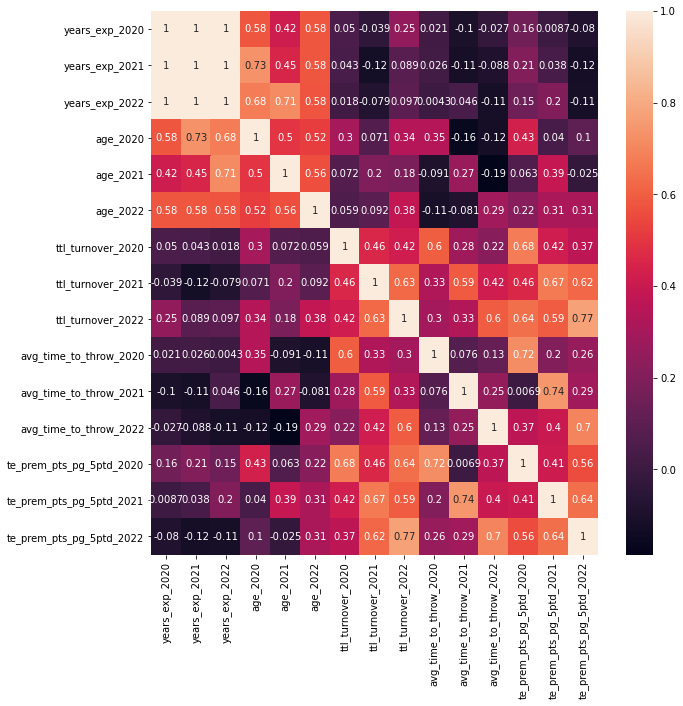

In [25]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(qb_filtered[['years_exp_2020', 'years_exp_2021', 'years_exp_2022',
                     'age_2020', 'age_2021', 'age_2022',
                   'ttl_turnover_2020', 'ttl_turnover_2021',
                   'ttl_turnover_2022', 'avg_time_to_throw_2020' , 'avg_time_to_throw_2021', 
                   'avg_time_to_throw_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

Seems age has a higher correlation on points scored than years experience. We'll use age for that measure. 

Average intended air yards is quite dependent on average time to throw. The more time to throw, the further the qbs throw. and thn the more fantasy points they score.


Text(0, 0.5, 'QB Fantasy points per game current season (2021)')

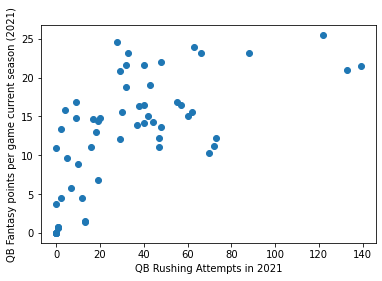

In [26]:
plt.scatter(qb_filtered['rushingatt_2021'], qb_filtered['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('QB Rushing Attempts in 2021')
plt.ylabel('QB Fantasy points per game current season (2021)')

Text(0, 0.5, 'QB Fantasy points per game current season (2021)')

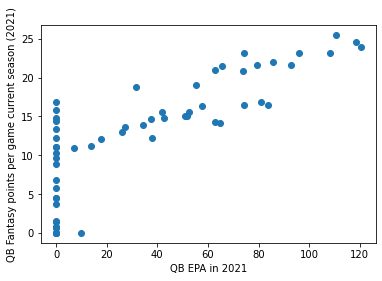

In [27]:
plt.scatter(qb_filtered['epa_total_2021'], qb_filtered['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('QB EPA in 2021')
plt.ylabel('QB Fantasy points per game current season (2021)')

Next: either more visualizations, or try to start modeling for QBs. Perhaps visualizations while transforming data if necessary.

# RB

### cleaning/filtering some data

In [40]:
rb_wide.head()

1std_2019  1std_2020  1std_2021  1std_2022  adp_2019  \
player_name                                                             
A.J. Dillon            NaN      358.0      375.0      107.0       NaN   
A.J. Ouellette       305.0        NaN        NaN        NaN       0.0   
A.J. Rose              NaN        NaN      332.0        NaN       NaN   
Aaron Jones          320.0      358.0      375.0      107.0      28.0   
Aaron Shampklin        NaN        NaN        NaN      101.0       NaN   

                 adp_2020  adp_2021  adp_2022  age_2019  age_2020  age_2021  \
player_name                                                                   
A.J. Dillon         129.0      82.0      46.0       NaN       0.0       0.0   
A.J. Ouellette        NaN       NaN       NaN       0.0       NaN       NaN   
A.J. Rose             NaN       0.0       NaN       NaN       NaN       0.0   
Aaron Jones          18.0       6.0      16.0      25.0      26.0      27.0   
Aaron Shampklin       NaN       NaN       0.0       NaN       NaN       NaN   

                 age_2022  aggressiveness_2019  aggressiveness_2020  \
player_name                                                           
A.J. Dillon           0.0                  NaN                  0.0   
A.J. Ouellette        NaN                  0.0                  NaN   
A.J. Rose             NaN                  NaN                  NaN   
Aaron Jones          28.0                  0.0                  0.0   
Aaron Shampklin       0.0                  NaN                  NaN   

                 aggressiveness_2021  aggressiveness_2022  attempts_2019  \
player_name                                                                
A.J. Dillon                      0.0                  0.0            NaN   
A.J. Ouellette                   NaN                  NaN            0.0   
A.J. Rose                        0.0                  NaN            NaN   
Aaron Jones                      0.0                  0.0            0.0   
Aaron Shampklin                  NaN                  0.0            NaN   

                 attempts_2020  attempts_2021  attempts_2022  \
player_name                                                    
A.J. Dillon                0.0            0.0            0.0   
A.J. Ouellette             NaN            NaN            NaN   
A.J. Rose                  NaN            0.0            NaN   
Aaron Jones                0.0            0.0            0.0   
Aaron Shampklin            NaN            NaN            0.0   

                 avg_air_distance_2019  avg_air_distance_2020  \
player_name                                                     
A.J. Dillon                        NaN                    0.0   
A.J. Ouellette                     0.0                    NaN   
A.J. Rose                          NaN                    NaN   
Aaron Jones                        0.0                    0.0   
Aaron Shampklin                    NaN                    NaN   

                 avg_air_distance_2021  avg_air_distance_2022  \
player_name                                                     
A.J. Dillon                        0.0                    0.0   
A.J. Ouellette                     NaN                    NaN   
A.J. Rose                          0.0                    NaN   
Aaron Jones                        0.0                    0.0   
Aaron Shampklin                    NaN                    0.0   

                 avg_air_yards_differential_2019  \
player_name                                        
A.J. Dillon                                  NaN   
A.J. Ouellette                               0.0   
A.J. Rose                                    NaN   
Aaron Jones                                  0.0   
Aaron Shampklin                              NaN   

                 avg_air_yards_differential_2020  \
player_name                                        
A.J. Dillon                                  0.0   
A.J. Ouellette                        

In [28]:
rb_wide.shape

(391, 368)

In [31]:
rb_wide[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 
    'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].isna().sum()

te_prem_pts_p5td_2019    143
te_prem_pts_p5td_2020    180
te_prem_pts_p5td_2021    175
te_prem_pts_p5td_2022    195
dtype: int64

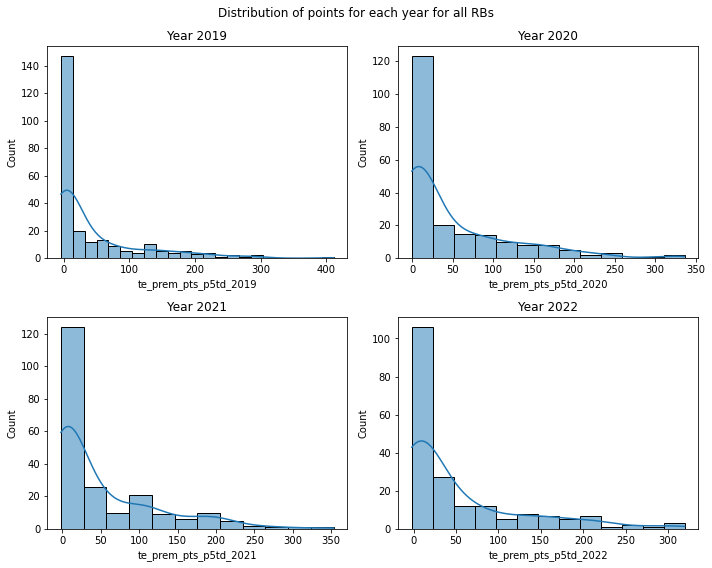

In [29]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Distribution of points for each year for all RBs')

# Iterate through each year and create the histogram in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(rb_wide[f'te_prem_pts_p5td_{year}'], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Year {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [34]:
# can we cut this data down to a relevant top percentile?
# utilizing nulls like we did with QBs, perhaps the top 50-60% can be kept

rb_wide[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 
    'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].quantile([ .3, .4, .5, .6, .6667, .7,])

te_prem_pts_p5td_2019  te_prem_pts_p5td_2020  te_prem_pts_p5td_2021  \
0.3000                 0.0000                 1.4000                1.25000   
0.4000                 0.5600                 7.2000                6.00000   
0.5000                 5.6000                15.7000               16.60000   
0.6000                15.5600                29.7000               33.60000   
0.6667                31.4749                48.4028               48.31756   
0.7000                44.7400                60.2000               59.20000   

        te_prem_pts_p5td_2022  
0.3000                 1.4500  
0.4000                 7.0000  
0.5000                16.5000  
0.6000                34.0000  
0.6667                43.9013  
0.7000                53.6500

In [36]:
# let's filter out QBs a bit further
# cut it about the top 3rd, or 66.7th percentile
# rb must register a season in the top 3rd of the league to be in final dataset

rb_filtered = rb_wide.loc[(rb_wide['te_prem_pts_p5td_2019'] >= 31.47 )| (rb_wide['te_prem_pts_p5td_2020'] >= 48.41) | \
                     (rb_wide['te_prem_pts_p5td_2021'] >= 48.32) |  (rb_wide['te_prem_pts_p5td_2022'] >= 43.9) ]

In [46]:
rb_filtered.loc[rb_filtered['age_2022'] == 0] ## need to fill these 0s in age with 1 or more less than the next year's age. or any existing years age


1std_2019  1std_2020  1std_2021  1std_2022  adp_2019  \
player_name                                                              
Benny Snell           265.0      322.0      323.0       92.0       0.0   
Derrick Gore            0.0      397.0      419.0      100.0       0.0   
Frank Gore            314.0      269.0        NaN       90.0     155.0   
James White           338.0      332.0      362.0       96.0      63.0   
Jeremy McNichols      298.0      381.0      362.0       92.0       0.0   
Patrick Laird         315.0      345.0      325.0      103.0       0.0   
Ronald Jones          353.0      364.0      404.0      147.0       0.0   
Wayne Gallman         311.0      297.0      332.0       98.0       0.0   

                  adp_2020  adp_2021  adp_2022  age_2019  age_2020  age_2021  \
player_name                                                                    
Benny Snell            0.0       0.0       0.0      21.0       0.0       0.0   
Derrick Gore           0.0       0.0       0.0       0.0       0.0      27.0   
Frank Gore             0.0       NaN       0.0      36.0      37.0       NaN   
James White           86.0     169.0       0.0      27.0      28.0      29.0   
Jeremy McNichols       0.0       0.0       0.0      24.0      25.0      26.0   
Patrick Laird          0.0       0.0       0.0      24.0      25.0      26.0   
Ronald Jones           0.0       0.0       0.0      22.0       0.0       0.0   
Wayne Gallman          0.0       0.0       0.0      25.0      26.0      27.0   

                  age_2022  aggressiveness_2019  aggressiveness_2020  \
player_name                                                            
Benny Snell            0.0                  0.0                  0.0   
Derrick Gore           0.0                  0.0                  0.0   
Frank Gore             0.0                  0.0                  0.0   
James White            0.0                  0.0                  0.0   
Jeremy McNichols       0.0                  0.0                  0.0   
Patrick Laird          0.0                  0.0                  0.0   
Ronald Jones           0.0                  0.0                  0.0   
Wayne Gallman          0.0                  0.0                  0.0   

                  aggressiveness_2021  aggressiveness_2022  attempts_2019  \
player_name                                                                 
Benny Snell                       0.0                  0.0            0.0   
Derrick Gore                      0.0                  0.0            0.0   
Frank Gore                        NaN                  0.0            0.0   
James White                       0.0                  0.0            0.0   
Jeremy McNichols                  0.0                  0.0            0.0   
Patrick Laird                     0.0                  0.0            0.0   
Ronald Jones                      0.0                  0.0            0.0   
Wayne Gallman                     0.0                  0.0            0.0   

                  attempts_2020  attempts_2021  attempts_2022  \
player_name                                                     
Benny Snell                 0.0            0.0            0.0   
Derrick Gore                0.0            0.0            0.0   
Frank Gore                  0.0            NaN            0.0   
James White                 0.0            0.0            0.0   
Jeremy McNichols            0.0            0.0            0.0   
Patrick Laird               0.0            0.0            0.0   
Ronald Jones                0.0            0.0            0.0   
Wayne Gallman               0.0            0.0            0.0   

                  avg_air_distance_2019  avg_air_distance_2020  \
player_name                                                      
Benny Snell                         0.0                    0.0   
Derrick Gore                        0.0                    0.0   
Frank Gore                          0.0                    0.0   
Jam

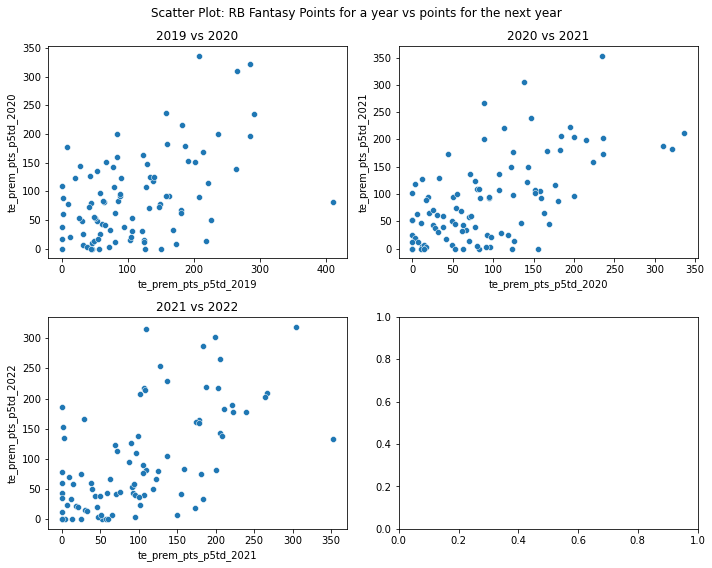

In [37]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: RB Fantasy Points for a year vs points for the next year')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'te_prem_pts_p5td_{year}', y=f'te_prem_pts_p5td_{next_year}', data=rb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'{year} vs {next_year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

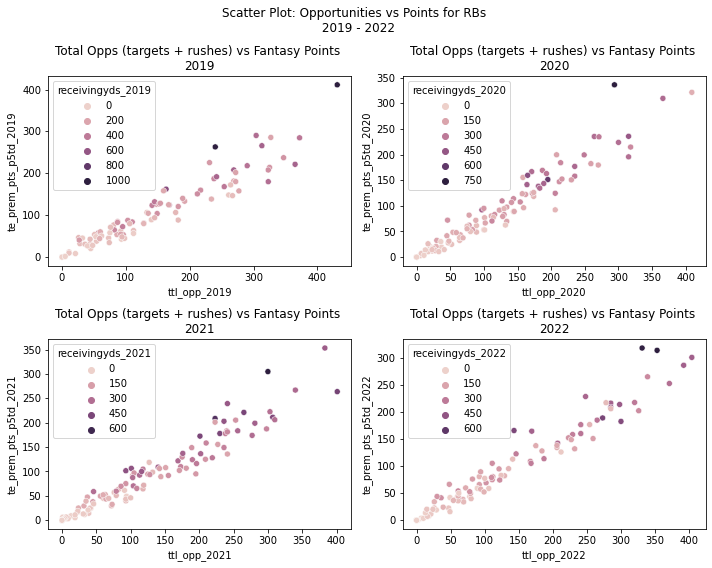

In [38]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Opportunities vs Points for RBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'ttl_opp_{year}', y=f'te_prem_pts_p5td_{year}', hue = f'receivingyds_{year}', data=rb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Total Opps (targets + rushes) vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

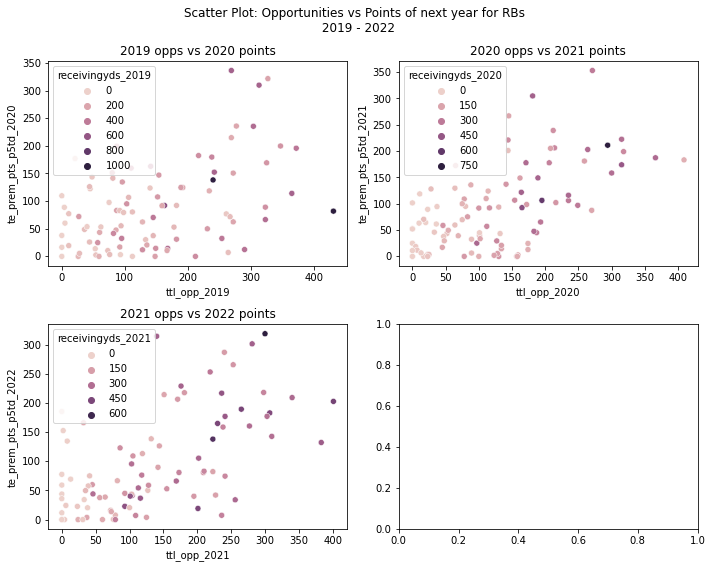

In [92]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Opportunities vs Points of next year for RBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'ttl_opp_{year}', y=f'te_prem_pts_p5td_{next_year}', hue = f'receivingyds_{year}', data=rb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'{year} opps vs {next_year} points')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

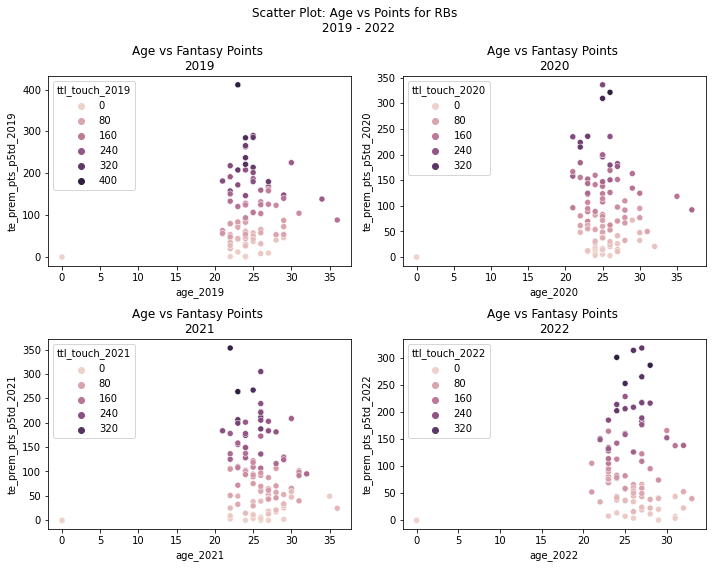

In [93]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Age vs Points for RBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'age_{year}', y=f'te_prem_pts_p5td_{year}', hue = f'ttl_touch_{year}', data=rb_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Age vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

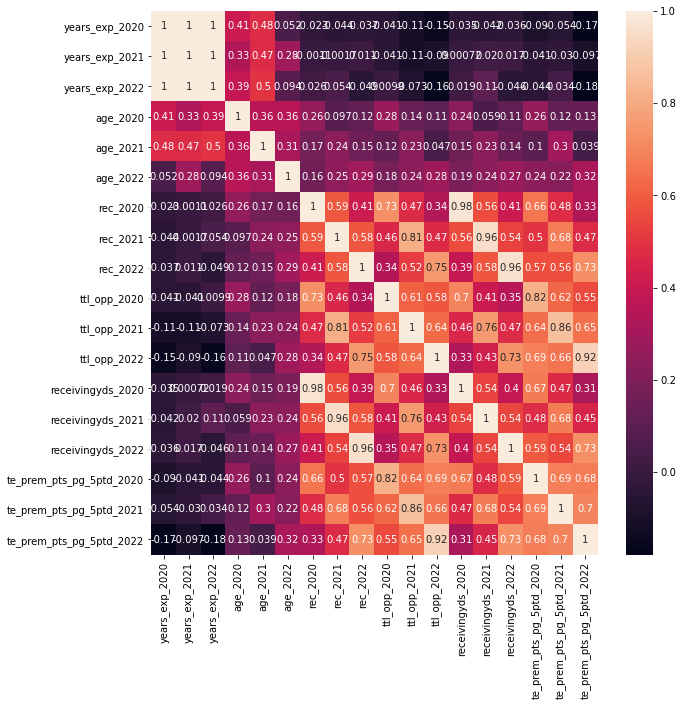

In [47]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(rb_filtered[['years_exp_2020', 'years_exp_2021', 'years_exp_2022',
                     'age_2020', 'age_2021', 'age_2022',
                   'rec_2020', 'rec_2021',
                   'rec_2022', 'ttl_opp_2020' , 'ttl_opp_2021', 
                   'ttl_opp_2022', 'receivingyds_2020', 'receivingyds_2021',
                     'receivingyds_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

Past year scoring has a high correlation (.75 - .8) with following years. Tll opportunities seem to more as well, and more than receptions. Age doesn't but perhaps that can change when filtering out a few more. Age seems to have more, though, than years experience.

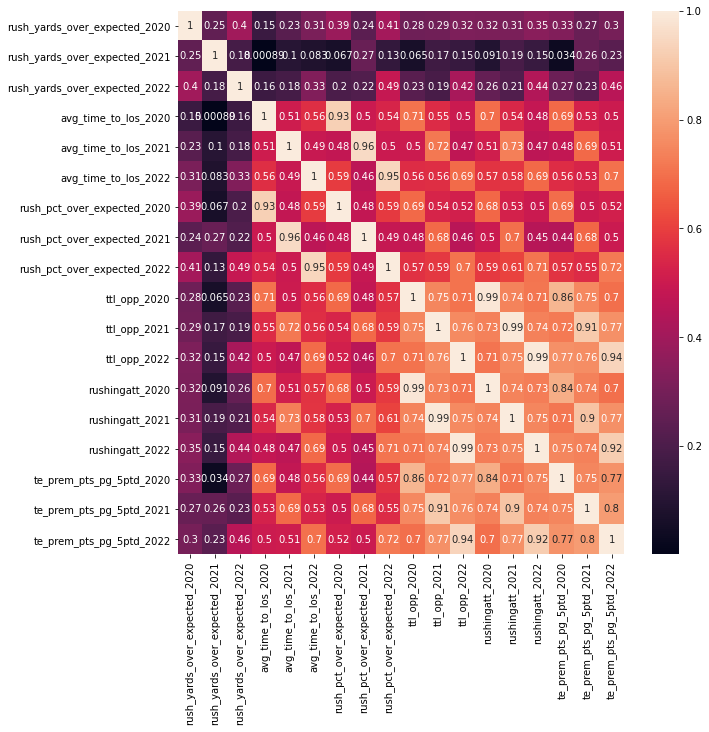

In [94]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(rb_wide[['rush_yards_over_expected_2020', 'rush_yards_over_expected_2021', 'rush_yards_over_expected_2022',
                     'avg_time_to_los_2020', 'avg_time_to_los_2021', 'avg_time_to_los_2022',
                   'rush_pct_over_expected_2020', 'rush_pct_over_expected_2021',
                   'rush_pct_over_expected_2022', 'ttl_opp_2020' , 'ttl_opp_2021', 
                   'ttl_opp_2022', 'rushingatt_2020', 'rushingatt_2021', 'rushingatt_2022',
                     'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

AVG_time_to_los and rush_pct over expected each have moderate correlations with points. We're going to use rush_pct_over_expected

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB HPPR Fantasy points in season(2021)')

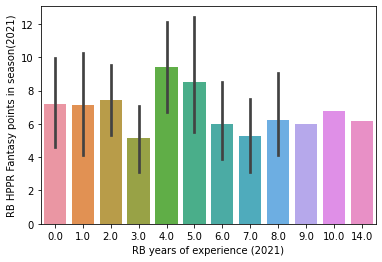

In [49]:
sns.barplot(rb_filtered['years_exp_2021'], rb_filtered['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('RB years of experience (2021)')
plt.ylabel('RB HPPR Fantasy points in season(2021)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB HPPR Fantasy points in season(2020)')

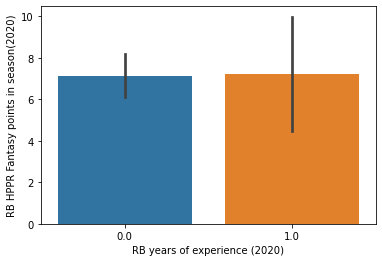

In [50]:
sns.barplot(rb_filtered['rookie_2021'], rb_filtered['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('RB years of experience (2020)')
plt.ylabel('RB HPPR Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB HPPR Fantasy points in season(2022)')

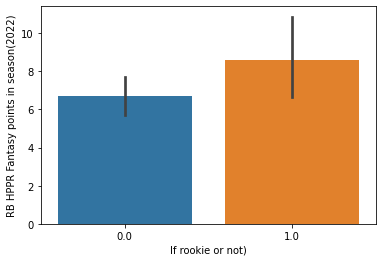

In [51]:
sns.barplot(rb_filtered['rookie_2022'], rb_filtered['te_prem_pts_pg_5ptd_2022'])
plt.xlabel('If rookie or not)')
plt.ylabel('RB HPPR Fantasy points in season(2022)')

### RBs Fantasy Performance and Next Gen Stats

Some columns that will have interest are:

    expected_rush_yards, avg_rush_yards, rush_yards_over_expected_per_att, rush_pct_over_expected_20, avg_time_to_los, efficiency
   

In [141]:
ff_rb[['expected_rush_yards', 'avg_rush_yards', 
       'rush_yards_over_expected_per_att', 'rush_pct_over_expected',
       'avg_time_to_los', 'tgt', 'efficiency']].describe()

expected_rush_yards  avg_rush_yards  rush_yards_over_expected_per_att  \
count            89.000000       89.000000                         89.000000   
mean             99.080604        4.201880                          0.056283   
std              43.855046        1.117222                          1.002475   
min              29.828809        1.777273                         -2.598908   
25%              54.694298        3.643813                         -0.430424   
50%             114.461527        4.190390                          0.012104   
75%             133.022209        4.650470                          0.385887   
max             203.814883       10.916667                          5.612688   

       rush_pct_over_expected  avg_time_to_los         tgt  efficiency  
count               89.000000        89.000000  269.000000   89.000000  
mean                 0.381529         2.785036   13.044610    4.284010  
std                  0.084128         0.186040   20.142724    0.990263  
min                  0.181818         2.251462    0.000000    2.037176  
25%                  0.336475         2.688563    0.000000    3.803401  
50%                  0.385745         2.779051    2.000000    4.094812  
75%                  0.418415         2.852184   20.000000    4.578386  
max                  0.636364         3.547667   94.000000    8.602485

<AxesSubplot:>

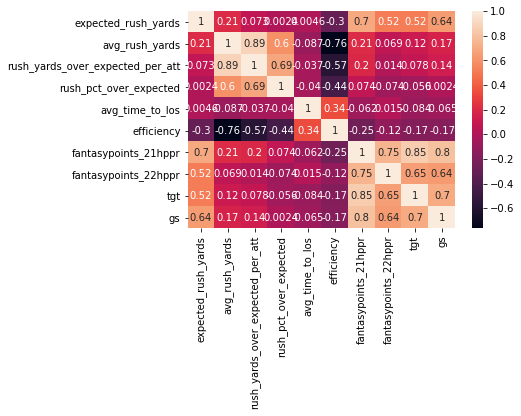

In [146]:
sns.heatmap(ff_rb[['expected_rush_yards', 'avg_rush_yards', 
       'rush_yards_over_expected_per_att', 'rush_pct_over_expected',
       'avg_time_to_los', 'efficiency', 'fantasypoints_21hppr', 'fantasypoints_22hppr', 'tgt', 'gs']].corr(), annot = True)

In [145]:
# let's see average amount of games played and points scored, to try to find a cutoff

ff_rb[['fantasypoints_21hppr', 'fantasypoints_22hppr', 
       'gp', 'gs']].describe()

fantasypoints_21hppr  fantasypoints_22hppr          gp          gs
count            161.000000            152.000000  152.000000  175.000000
mean              68.847826             72.888158   11.677632    3.674286
std               73.823248             83.048215    5.244489    4.957541
min               -2.000000             -2.000000    1.000000    0.000000
25%               10.500000             10.125000    8.000000    0.000000
50%               40.000000             37.000000   13.000000    1.000000
75%              107.000000            108.800000   16.000000    5.500000
max              353.000000            354.200000   17.000000   17.000000

In [149]:
ff_rb['fantasypoints_21hppr'].quantile(.75)

107.0

In [147]:
# subsetting to get 'qualifying' RBs

ff_rb_qual = ff_rb.loc[(ff_rb['fantasypoints_21hppr'] >= ff_rb['fantasypoints_21hppr'].quantile(.75))]

<AxesSubplot:>

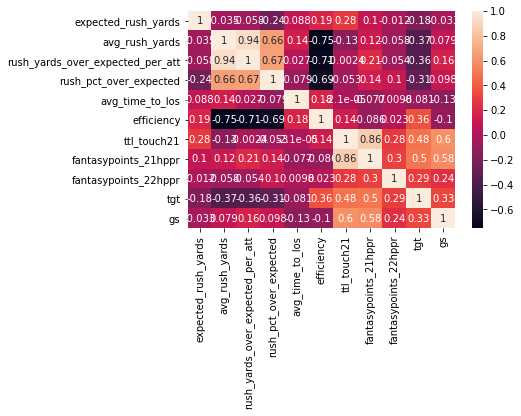

In [150]:
sns.heatmap(ff_rb_qual[['expected_rush_yards', 'avg_rush_yards', 
       'rush_yards_over_expected_per_att', 'rush_pct_over_expected',
       'avg_time_to_los', 'efficiency', 'ttl_touch21', 'fantasypoints_21hppr', 'fantasypoints_22hppr', 'tgt', 'gs']].corr(), annot = True)

### WR

In [87]:
wr_wide.describe()

1std_2019   1std_2020   1std_2021   1std_2022    adp_2019    adp_2020  \
count  398.00000  330.000000  315.000000  329.000000  398.000000  330.000000   
mean   298.78392  317.184848  314.200000   93.300912   13.695980   17.893939   
std     94.61982  100.928843  104.818077   33.758703   37.504062   43.508560   
min      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    305.00000  322.000000  306.000000   84.000000    0.000000    0.000000   
50%    317.00000  347.500000  332.000000  103.000000    0.000000    0.000000   
75%    346.00000  366.000000  364.500000  107.000000    0.000000    0.000000   
max    386.00000  397.000000  419.000000  147.000000  188.000000  195.000000   

         adp_2021    adp_2022    age_2019    age_2020    age_2021    age_2022  \
count  315.000000  329.000000  398.000000  330.000000  315.000000  329.000000   
mean    20.247619    7.854103   15.017588   17.245455   19.593651   18.246201   
std     48.385155   23.589024   12.767133   12.262717   11.331708   12.047297   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000   21.000000    0.000000   
50%      0.000000    0.000000   23.000000   24.000000   24.000000   24.000000   
75%      0.000000    0.000000   26.000000   26.000000   27.000000   26.000000   
max    219.000000  114.000000   36.000000   37.000000   36.000000   36.000000   

       avg_cushion_2019  avg_cushion_2020  avg_cushion_2021  avg_cushion_2022  \
count        398.000000        330.000000        315.000000        329.000000   
mean           2.286343          2.875508          3.059362          2.740841   
std            2.948832          3.129010          3.139052          3.225524   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          2.700000          0.000000   
75%            5.540224          6.091678          6.136352          6.155249   
max            9.106000          9.266000          9.392500         10.856000   

       avg_expected_yac_2019  avg_expected_yac_2020  avg_expected_yac_2021  \
count             398.000000             330.000000             315.000000   
mean                1.432770               1.788682               1.908116   
std                 1.977555               2.116424               2.174356   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.192785   
75%                 3.223910               3.642005               3.521824   
max                 6.994341               8.775607              11.322623   

       avg_expected_yac_2022  avg_intended_air_yards_2019  \
count             329.000000                   398.000000   
mean                1.659000                     4.298667   
std                 2.088221                     5.824177   
min                 0.000000                     0.000000   
25%                 0.000000                     0.000000   
50%                 0.000000                     0.000000   
75%                 3.524083                     9.479296   
max                 7.713361                    26.358571   

       avg_intended_air_yards_2020  avg_intended_air_yards_2021  \
count                   330.000000                   315.000000   
mean                      5.201547                     5.385189   
std                       6.255255                     5.901748   
min                       0.000000                    -1.840714   
25%                       0.000000                     0.000000   
50%                       0.000000                     1.811427   
75%                      10.220374                    10.512713   
max                      35.090000   

In [52]:
wr_wide.shape

(620, 308)

In [53]:
wr_wide[['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020', 'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_p5td_2022']].isna().sum()

te_prem_pts_pg_5ptd_2019    222
te_prem_pts_pg_5ptd_2020    290
te_prem_pts_pg_5ptd_2021    305
te_prem_pts_p5td_2022       291
dtype: int64

We can probably get rid of 1/3 to 50% of the top wrs, using a similar method as before. First, let's see the distribution of scoring for all WRs.

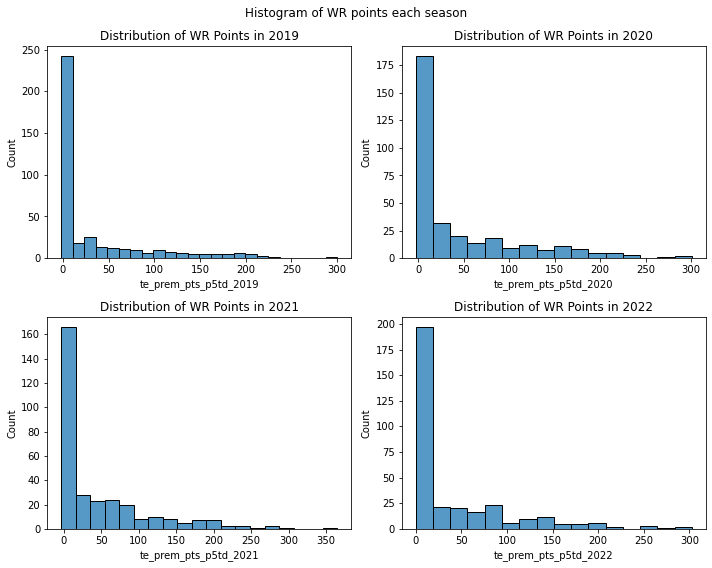

In [72]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Histogram of WR points each season')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(x=f'te_prem_pts_p5td_{year}',data= wr_wide, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of WR Points in {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [55]:
wr_wide[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].quantile([.1, .2, .3, .4, .5, .6, .63, .6667, .7])



te_prem_pts_p5td_2019  te_prem_pts_p5td_2020  te_prem_pts_p5td_2021  \
0.1000                0.00000                0.00000                0.00000   
0.2000                0.00000                0.00000                0.00000   
0.3000                0.00000                0.00000                0.00000   
0.4000                0.00000                1.34000                3.52000   
0.5000                2.20000                8.40000               11.50000   
0.6000                8.80000               23.68000               28.08000   
0.6300               13.65500               31.07000               38.98200   
0.6667               27.44764               37.90329               47.57818   
0.7000               33.34000               49.82000               56.64000   

        te_prem_pts_p5td_2022  
0.1000                0.00000  
0.2000                0.00000  
0.3000                0.00000  
0.4000                0.84000  
0.5000                6.60000  
0.6000               19.60000  
0.6300               28.46400  
0.6667               39.58416  
0.7000               50.23200

Let's take the top 3rd -- they must have finished in the top 3rd at least one of these seasons.

In [56]:
wr_filtered = wr_wide.loc[(wr_wide['te_prem_pts_p5td_2019'] >= 27.45 )| (wr_wide['te_prem_pts_p5td_2020'] >= 37.90) | \
                     (wr_wide['te_prem_pts_p5td_2021'] >= 47.58) |  (wr_wide['te_prem_pts_p5td_2022'] >= 39.58) ]

print('nulls of wr_filtered now: ', 
      wr_filtered[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].isna().sum(),
     'Shape of wr_filtered: ',
     wr_filtered.shape)

nulls of wr_filtered now:  te_prem_pts_p5td_2019    51
te_prem_pts_p5td_2020    35
te_prem_pts_p5td_2021    34
te_prem_pts_p5td_2022    47
dtype: int64 Shape of wr_filtered:  (209, 308)


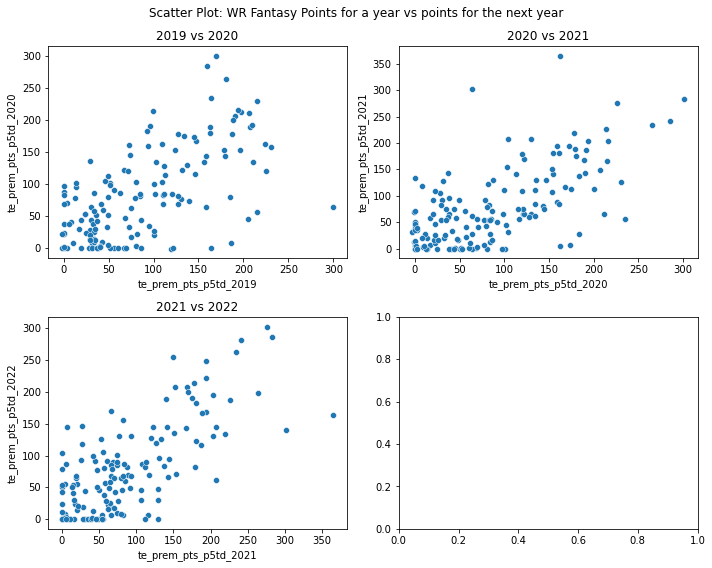

In [125]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: WR Fantasy Points for a year vs points for the next year')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'te_prem_pts_p5td_{year}', y=f'te_prem_pts_p5td_{next_year}', data= wr_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'{year} vs {next_year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [57]:
wr_filtered.head()

1std_2019  1std_2020  1std_2021  1std_2022  adp_2019  \
player_name                                                            
A.J. Brown          317.0      381.0      362.0      122.0       0.0   
A.J. Green          312.0      318.0      367.0      112.0      66.0   
Adam Humphries      317.0      381.0        0.0        NaN       0.0   
Adam Thielen        314.0      383.0      332.0      121.0      24.0   
Albert Wilson       315.0      345.0      325.0        NaN       0.0   

                adp_2020  adp_2021  adp_2022  age_2019  age_2020  age_2021  \
player_name                                                                  
A.J. Brown          46.0      26.0      28.0      22.0      23.0      24.0   
A.J. Green          73.0     186.0       0.0       0.0      32.0      33.0   
Adam Humphries       0.0       0.0       NaN      26.0      27.0      28.0   
Adam Thielen        31.0      54.0      71.0      29.0      30.0      31.0   
Albert Wilson        0.0       0.0       NaN      27.0       0.0      29.0   

                age_2022  avg_cushion_2019  avg_cushion_2020  \
player_name                                                    
A.J. Brown          25.0          4.998002          5.459333   
A.J. Green          34.0          0.000000          5.327914   
Adam Humphries       NaN          5.925798          6.292988   
Adam Thielen        32.0          6.427153          5.949418   
Albert Wilson        NaN          7.035792          0.000000   

                avg_cushion_2021  avg_cushion_2022  avg_expected_yac_2019  \
player_name                                                                 
A.J. Brown              6.147317          5.641254               4.037331   
A.J. Green              5.827793          5.633937               0.000000   
Adam Humphries          6.306215               NaN               3.869869   
Adam Thielen            5.911510          6.134638               4.177237   
Albert Wilson           6.722083               NaN               4.095299   

                avg_expected_yac_2020  avg_expected_yac_2021  \
player_name                                                    
A.J. Brown                   3.642770               3.663129   
A.J. Green                   1.604429               4.116826   
Adam Humphries               2.953779               4.775217   
Adam Thielen                 2.841690               3.466008   
Albert Wilson                0.000000               6.933007   

                avg_expected_yac_2022  avg_intended_air_yards_2019  \
player_name                                                          
A.J. Brown                   4.558055                    12.586335   
A.J. Green                   1.979009                     0.000000   
Adam Humphries                    NaN                     7.091745   
Adam Thielen                 3.450323                    12.714965   
Albert Wilson                     NaN                     4.896085   

                avg_intended_air_yards_2020  avg_intended_air_yards_2021  \
player_name                                                                
A.J. Brown                        11.095020                    12.029758   
A.J. Green                        13.604789                    12.038599   
Adam Humphries                     8.382262                     6.206948   
Adam Thielen                      13.131793                     9.566764   
Albert Wilson                      0.000000                     3.132812   

                avg_intended_air_yards_2022  avg_per_catch_2019  \
player_name                                                       
A.J. Brown                        11.734585           20.211538   
A.J. Green                        11.850852            0.000000   
Adam Humphries                          NaN           10.108108   
Adam Thielen                      10.038573           13.933333   
Albert Wilson                           NaN            8.162791   

                avg_per_catch_20

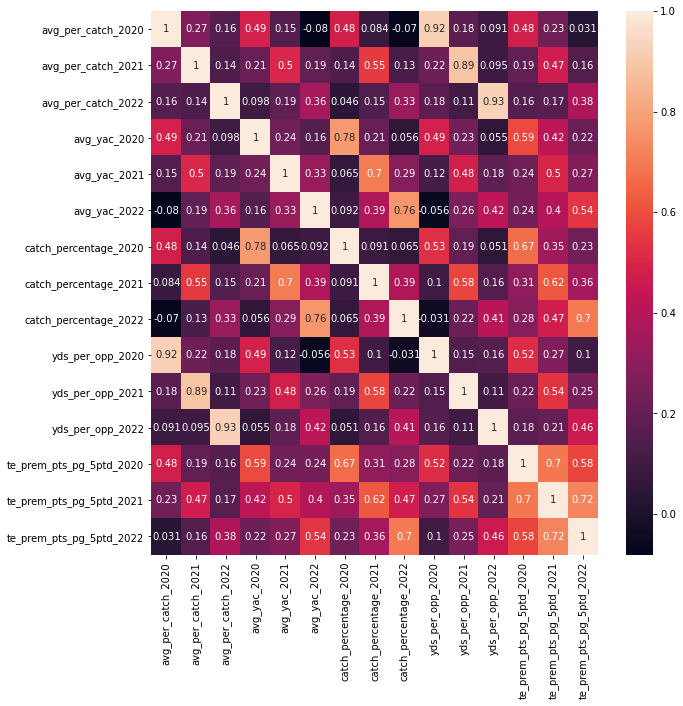

In [60]:
# let's look some possibly interesting figures for WRs
# many next gen stats

plt.figure(figsize = (10,10))

sns.heatmap(wr_filtered[['avg_per_catch_2020', 'avg_per_catch_2021', 'avg_per_catch_2022',
                     'avg_yac_2020', 'avg_yac_2021', 'avg_yac_2022',
                   'catch_percentage_2020', 'catch_percentage_2021',
                   'catch_percentage_2022', 'yds_per_opp_2020' , 'yds_per_opp_2021', 
                   'yds_per_opp_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

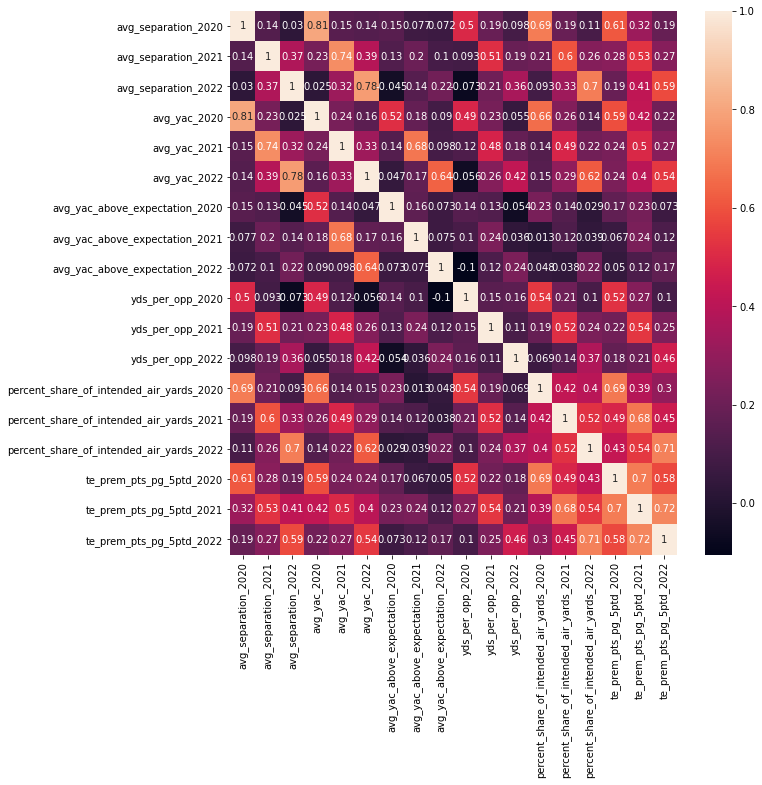

In [61]:
# let's look some possibly interesting figures for WRs
# many next gen stats

plt.figure(figsize = (10,10))

sns.heatmap(wr_filtered[['avg_separation_2020', 'avg_separation_2021', 'avg_separation_2022',
                     'avg_yac_2020', 'avg_yac_2021', 'avg_yac_2022',
                   'avg_yac_above_expectation_2020', 'avg_yac_above_expectation_2021',
                   'avg_yac_above_expectation_2022', 'yds_per_opp_2020' , 'yds_per_opp_2021', 
                   'yds_per_opp_2022', 'percent_share_of_intended_air_yards_2020', 
                  'percent_share_of_intended_air_yards_2021', 'percent_share_of_intended_air_yards_2022',
                         'te_prem_pts_pg_5ptd_2020', 'te_prem_pts_pg_5ptd_2021',
                         'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()


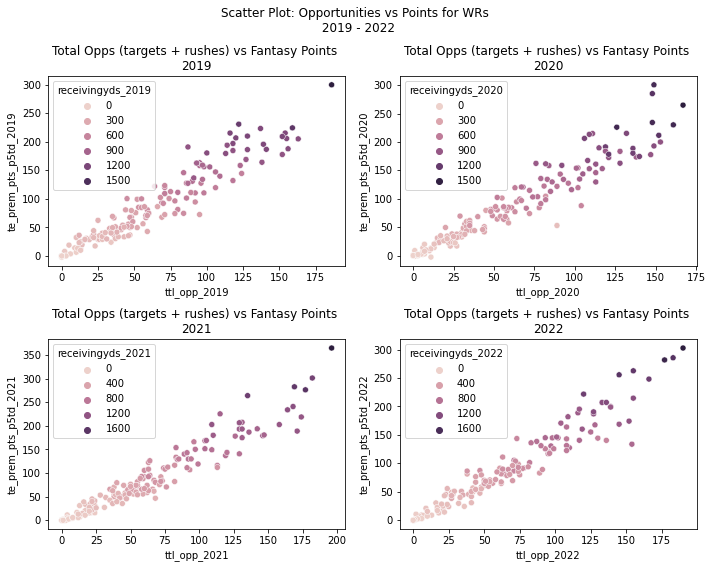

In [59]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Opportunities vs Points for WRs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'ttl_opp_{year}', y=f'te_prem_pts_p5td_{year}', hue = f'receivingyds_{year}', data=wr_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Total Opps (targets + rushes) vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

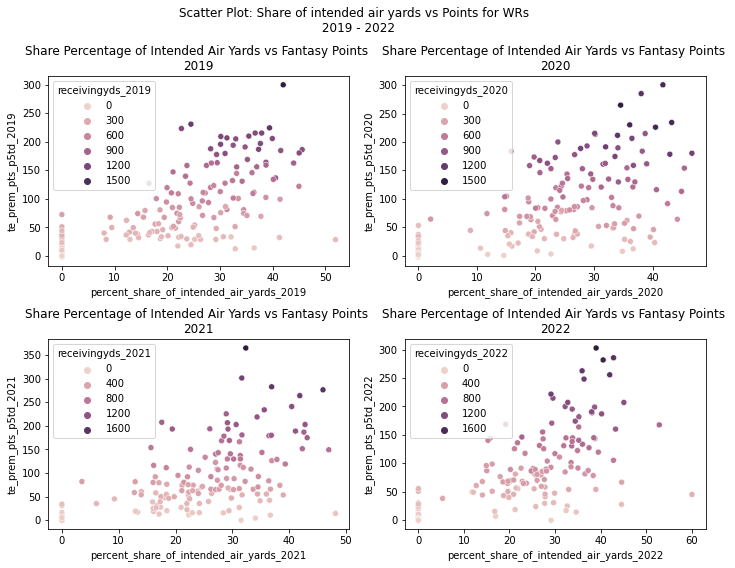

In [62]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Share of intended air yards vs Points for WRs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'percent_share_of_intended_air_yards_{year}', y=f'te_prem_pts_p5td_{year}', \
                    hue = f'receivingyds_{year}', data=wr_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Share Percentage of Intended Air Yards vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

Text(0, 0.5, 'WR Fantasy points in season(2021)')

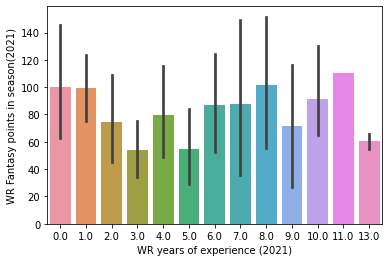

In [63]:
sns.barplot( data = wr_filtered, x = 'years_exp_2021', y = 'te_prem_pts_p5td_2021')
plt.xlabel('WR years of experience (2021)')
plt.ylabel('WR Fantasy points in season(2021)')

Text(0, 0.5, 'WR Fantasy points in season(2022)')

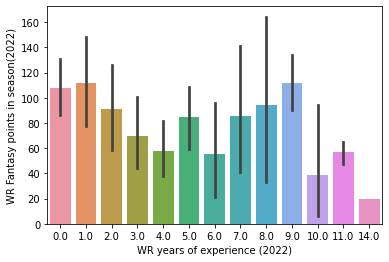

In [64]:
sns.barplot( data = wr_filtered, x = 'years_exp_2022', y = 'te_prem_pts_p5td_2022')
plt.xlabel('WR years of experience (2022)')
plt.ylabel('WR Fantasy points in season(2022)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WR Fantasy Average total points in season(2022)')

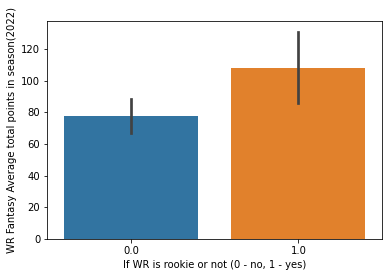

In [67]:
sns.barplot(wr_filtered['rookie_2022'], wr_filtered['te_prem_pts_p5td_2022'] )
plt.xlabel('If WR is rookie or not (0 - no, 1 - yes)')
plt.ylabel('WR Fantasy Average total points in season(2022)')

<AxesSubplot:>

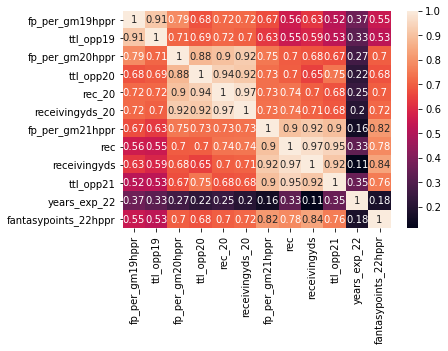

In [136]:
sns.heatmap(ff_wr[['fp_per_gm19hppr', 'ttl_opp19','fp_per_gm20hppr', 'ttl_opp20', 'rec_20', 'receivingyds_20',
                       'fp_per_gm21hppr',  'rec', 'receivingyds', 'ttl_opp21', 'years_exp_22', 'fantasypoints_22hppr']].corr(), annot = True)

### TE

In [69]:
te_wide.head()

1std_2019  1std_2020  1std_2021  1std_2022  adp_2019  \
player_name                                                                
A.J. Derby              347.0        NaN        NaN        NaN       0.0   
Adam Shaheen            297.0      345.0      325.0       99.0       0.0   
Adam Trautman             NaN      367.0      307.0      100.0       NaN   
Albert Okwuegbunam        NaN      308.0      331.0       84.0       NaN   
Alex Ellis              354.0        NaN      367.0        NaN       0.0   

                    adp_2020  adp_2021  adp_2022  age_2019  age_2020  \
player_name                                                            
A.J. Derby               NaN       NaN       NaN       0.0       NaN   
Adam Shaheen             0.0       0.0       0.0      25.0      26.0   
Adam Trautman            0.0     173.0       0.0       NaN      23.0   
Albert Okwuegbunam       0.0       0.0       0.0       NaN      22.0   
Alex Ellis               NaN       0.0       NaN      26.0       NaN   

                    age_2021  age_2022  avg_cushion_2019  avg_cushion_2020  \
player_name                                                                  
A.J. Derby               NaN       NaN               0.0               NaN   
Adam Shaheen            27.0       0.0               0.0          0.000000   
Adam Trautman           24.0      25.0               NaN          0.000000   
Albert Okwuegbunam      23.0      24.0               NaN          7.725667   
Alex Ellis               0.0       NaN               0.0               NaN   

                    avg_cushion_2021  avg_cushion_2022  avg_expected_yac_2019  \
player_name                                                                     
A.J. Derby                       NaN               NaN                    0.0   
Adam Shaheen                3.196667            0.0000                    0.0   
Adam Trautman               6.032467            0.0000                    NaN   
Albert Okwuegbunam          6.296250            4.5385                    NaN   
Alex Ellis                  0.000000               NaN                    0.0   

                    avg_expected_yac_2020  avg_expected_yac_2021  \
player_name                                                        
A.J. Derby                            NaN                    NaN   
Adam Shaheen                     0.000000               2.719246   
Adam Trautman                    0.000000               4.545758   
Albert Okwuegbunam               7.474475               4.449491   
Alex Ellis                            NaN               0.000000   

                    avg_expected_yac_2022  avg_intended_air_yards_2019  \
player_name                                                              
A.J. Derby                            NaN                          0.0   
Adam Shaheen                     0.000000                          0.0   
Adam Trautman                    0.000000                          NaN   
Albert Okwuegbunam               5.131349                          NaN   
Alex Ellis                            NaN                          0.0   

                    avg_intended_air_yards_2020  avg_intended_air_yards_2021  \
player_name                                                                    
A.J. Derby                                  NaN                          NaN   
Adam Shaheen                           0.000000                     3.730000   
Adam Trautman                          0.000000                     5.564679   
Albert Okwuegbunam                     9.566071                     1.508000   
Alex Ellis                                  NaN                     0.000000   

                    avg_intended_air_yards_2022  avg_per_catch_2019  \
player_name                                                           
A.J. Derby                                  NaN            0.000000   
Adam Shaheen                                0.0            8.222222   
Adam Trautman             

In [70]:
te_wide.shape

(336, 348)

In [75]:
te_wide[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].isna().sum()

te_prem_pts_p5td_2019    125
te_prem_pts_p5td_2020    158
te_prem_pts_p5td_2021    147
te_prem_pts_p5td_2022    170
dtype: int64

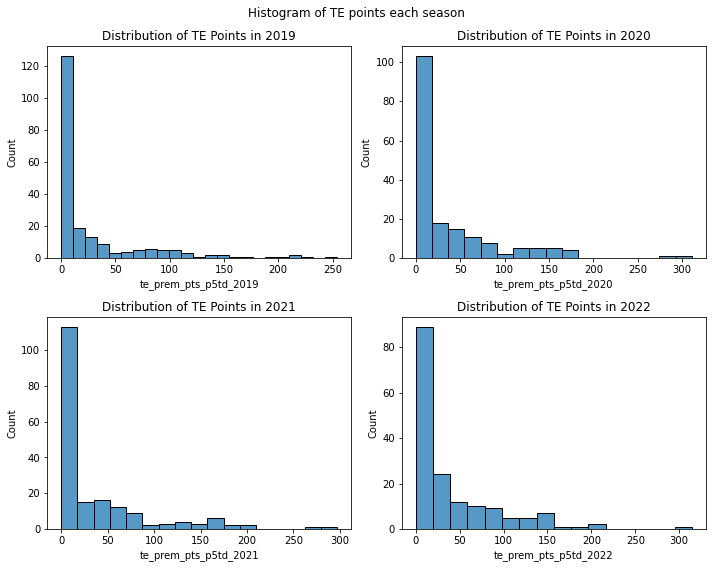

In [73]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Histogram of TE points each season')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(x=f'te_prem_pts_p5td_{year}',data= te_wide, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of TE Points in {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [74]:
# can we cut this data down to a relevant top percentile?

te_wide[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 
    'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].quantile([ .3, .4, .5, .6, .67,.7, .75, .8])

te_prem_pts_p5td_2019  te_prem_pts_p5td_2020  te_prem_pts_p5td_2021  \
0.30                   0.00                   0.00                  0.000   
0.40                   0.00                   1.92                  1.720   
0.50                   1.80                   7.50                  6.400   
0.60                  13.10                  21.92                 18.280   
0.67                  19.47                  31.49                 32.596   
0.70                  23.40                  38.64                 38.340   
0.75                  33.15                  51.60                 50.400   
0.80                  47.90                  64.88                 62.700   

      te_prem_pts_p5td_2022  
0.30                  0.000  
0.40                  5.600  
0.50                 17.550  
0.60                 26.800  
0.67                 37.175  
0.70                 40.800  
0.75                 55.900  
0.80                 74.200

In [79]:
# to stay consistent, let's make the cutoff at top 3rd again

# let's filter out QBs a bit further

te_filtered = te_wide.loc[(te_wide['te_prem_pts_p5td_2019'] >= 19.47 )| (te_wide['te_prem_pts_p5td_2020'] >= 31.49) | \
                     (te_wide['te_prem_pts_p5td_2021'] >= 32.6) |  (te_wide['te_prem_pts_p5td_2022'] >= 37.2) ]


print('nulls of te_filtered now: ', 
      te_filtered[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].isna().sum(),
     'Shape of te_filtered: ',
    te_filtered.shape)


nulls of te_filtered now:  te_prem_pts_p5td_2019    27
te_prem_pts_p5td_2020    26
te_prem_pts_p5td_2021    23
te_prem_pts_p5td_2022    31
dtype: int64 Shape of te_filtered:  (113, 348)


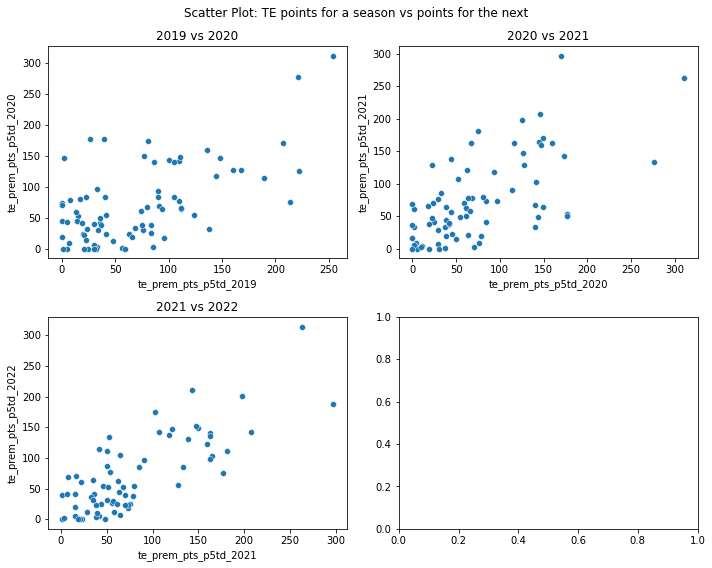

In [80]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: TE points for a season vs points for the next')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'te_prem_pts_p5td_{year}', y=f'te_prem_pts_p5td_{next_year}', data= te_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'{year} vs {next_year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

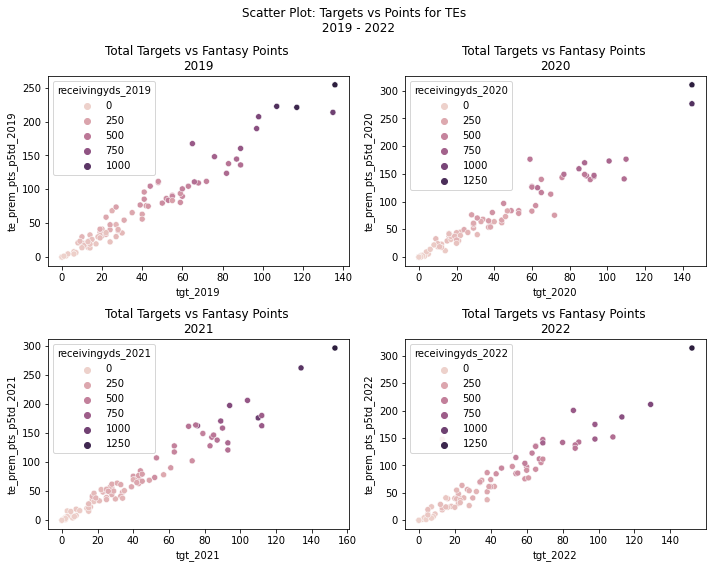

In [82]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Targets vs Points for TEs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'tgt_{year}', y=f'te_prem_pts_p5td_{year}', hue = f'receivingyds_{year}', data=te_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Total Targets vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

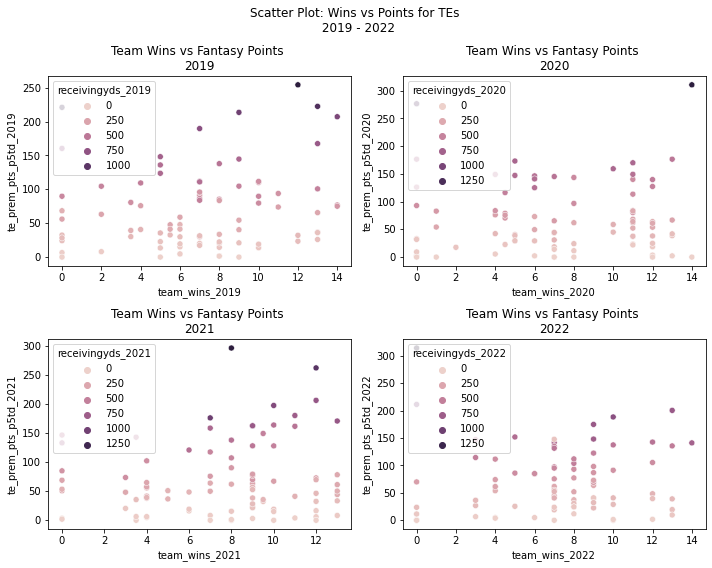

In [85]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Wins vs Points for TEs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'team_wins_{year}', y=f'te_prem_pts_p5td_{year}', hue = f'receivingyds_{year}', data=te_filtered, ax=axes[row, col])
    axes[row, col].set_title(f'Team Wins vs Fantasy Points \n{year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [91]:
### Saving DFs to do initial modeling on

qb_filtered.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide_filtered.csv")
rb_filtered.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_wide_filtered.csv")
wr_filtered.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_wide_filtered.csv")
te_filtered.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_wide_filtered.csv")